In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dfCsv = pd.read_csv("datas/bank/bank-full.csv")
defaultMap = {'yes':1 ,'no':0}
loanMap = {'yes':1 ,'no':0}
targetMap = {'yes':1 ,'no':0}
housingMap = {'yes':1 ,'no':0}
maritalMap = {'single':0 ,'married':1,'divorced':2}
educationMap = {'unknown':0 ,'primary':1,'secondary':2,'tertiary':3}
contactMap = {'unknown':0 ,'cellular':1,'telephone':1}
poutcomeMap = {'unknown':0, 'success':1,'failure':2,'other':3}
monthMap = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7,'aug':8,'sep':9, 'oct':10,'nov':11,'dec':12}

# df = dfCsv
# #clean dataframe
# df['default'] = dfCsv['default'].map({'yes':1 ,'no':0}) 
# df['loan'] = dfCsv['loan'].map({'yes':1 ,'no':0}) 
# df['Target'] = dfCsv['Target'].map({'yes':1 ,'no':0}) 
# df['housing'] = dfCsv['housing'].map({'yes':1 ,'no':0})
# df['marital'] = dfCsv['marital'].map({'single':0 ,'married':1,'divorced':2})
# df['education'] = dfCsv['education'].map({'unknown':0 ,'primary':1,'secondary':2,'tertiary':3})
# df['contact'] = dfCsv['contact'].map({'unknown':0 ,'cellular':1,'telephone':1})
# df['poutcome'] = dfCsv['poutcome'].map({'unknown':0, 'success':1,'failure':2,'other':3})
# df['month'] = dfCsv['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7,'aug':8,'sep':9, 'oct':10,'nov':11,'dec':12})

# dfCsv.drop(["job"], axis=1, inplace=True)
# # dfCsv
# df

In [ ]:
# df.dtypes
# # df.isnull().sum()

In [14]:
# df['month'].value_counts(dropna=False)


In [15]:
# Importation du générateur de rapport de profile
from pandas_profiling import ProfileReport

In [16]:
# profile = ProfileReport(df)
# profile.to_file('bank-full-report.html')
def balancingTragetResult(df):
    count = df["Target"].value_counts()
    countNo = count['no']
    countYes = count['yes']

    dfTargetNo = df.loc[(df['Target'] == 'no')].sample(n = countYes, random_state = 23)
    dfTargetYes = df.loc[(df['Target'] == 'yes')]
    # dfClientDatadfReadable = pd.concat([dfTargetNo, dfTargetYes])
    return pd.concat([dfTargetNo, dfTargetYes])


In [129]:
def dfAgeScale(df):
    bins = [18, 25, 30, 40, 48, 56, 80, 90, 100]
    labels = ['18-24','25-29', '30-39', '40-47', '48-55', '56-60', '61-79', '80-99']
    df['age'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)
    return df

#split data for the first model

# Clean data for the model
dfClientData = dfCsv[['age','marital','education','default','balance','housing','loan','Target']]
dfClientData = balancingTragetResult(dfClientData)
dfClientData['default'] = dfClientData['default'].map(defaultMap) 
dfClientData['loan'] = dfClientData['loan'].map(loanMap) 
dfClientData['Target'] = dfClientData['Target'].map(targetMap) 
dfClientData['housing'] = dfClientData['housing'].map(housingMap)
dfClientData['marital'] = dfClientData['marital'].map(maritalMap)
dfClientData['education'] = dfClientData['education'].map(educationMap)
dfClientData = dfAgeScale(dfClientData)
dfClientData['age'] = dfClientData['age'].map({'18-24':1,'25-29':2, '30-39':3, '40-47':4, '48-55':5, '56-60':6, '61-79':7, '80-99':8})

#brut data for the graph 
dfClientBrutData = dfCsv[['age','marital','education','default','balance','housing','loan','Target']]

#Brut data converted 
dfClientDataReadable = dfCsv[['age','marital','education','default','balance','housing','loan','Target']]
dfClientDataReadable = balancingTragetResult(dfClientDataReadable)
dfClientDataReadable = dfAgeScale(dfClientDataReadable)

dfClientBrutData

# dfClientData['age'].value_counts()
# dfTargetNo['Target'].value_counts()

,age,marital,education,default,balance,housing,loan,Target
0,58,married,tertiary,no,2143,yes,no,no
1,44,single,secondary,no,29,yes,no,no
2,33,married,secondary,no,2,yes,yes,no
3,47,married,unknown,no,1506,yes,no,no
4,33,single,unknown,no,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,yes
45207,71,divorced,primary,no,1729,no,no,yes
45208,72,married,secondary,no,5715,no,no,yes
45209,57,married,secondary,no,668,no,no,no


In [114]:
# dfClientData["Target"].value_counts()

# dfClientDataDelTargetZeroVal = dfClientData.Target
# dfClientDataDelTargetZeroVal

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# First model

In [116]:
y = dfClientData.Target
x = dfClientData.drop(['Target'], axis = 1)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 42)

In [117]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [118]:
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=2, random_state=23)

In [119]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])

,Importance en %
age,7.955406
marital,3.166001
education,4.196384
default,0.439588
balance,78.053213
housing,4.338303
loan,1.851106


In [120]:
# import shap

# shpv = shap.TreeExplainer(rf).shap_values(x_train)
# shap.summary_plot(shpv, x_train)
import plotly.express as px

def histogram(df, x, y):
    fig = px.histogram(df, x=x,y=y)
    fig.show()
    
def pieChart(df, values, names):
    fig = px.pie(df, values=x,names=y)
    fig.show()

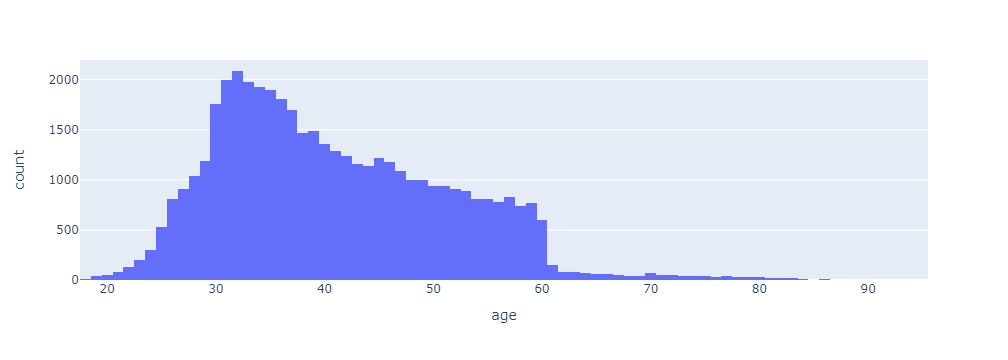

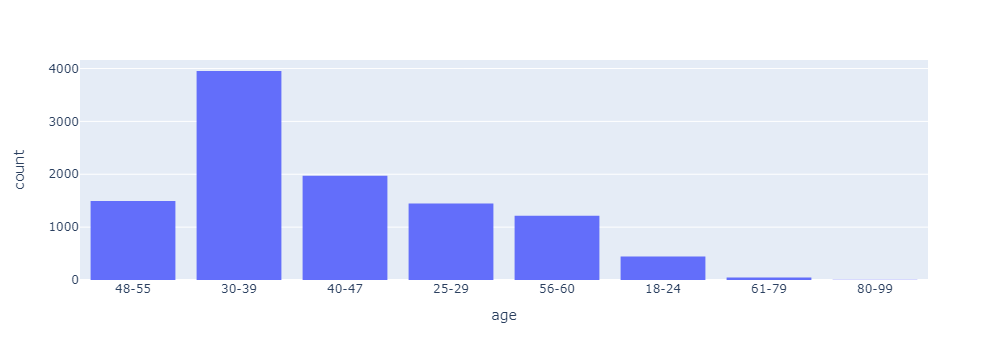

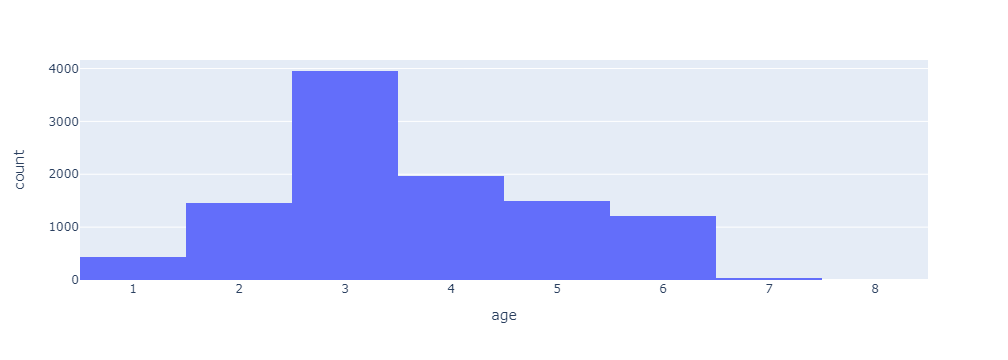

In [130]:
fig = px.histogram(dfClientBrutData.age, x='age')
fig.show()
fig = px.histogram(dfClientDataReadableScaling.age, x='age')
fig.show()
fig = px.histogram(dfClientData.age, x='age')
fig.show()

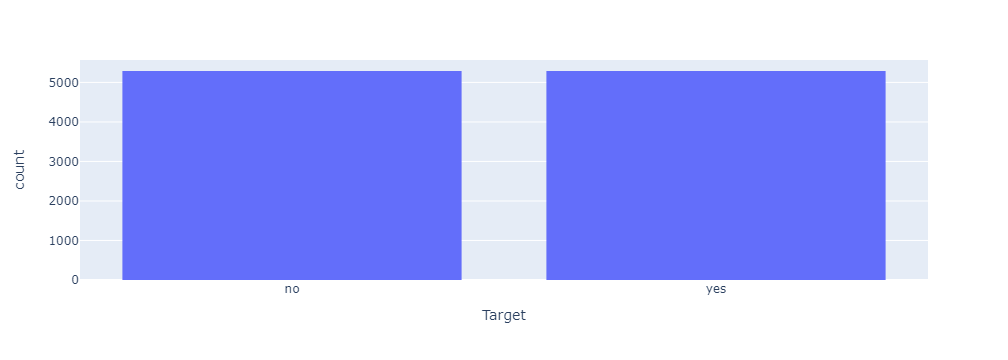

In [112]:
fig = px.histogram(dfClientDataReadable.Target, x='Target')
fig.show()

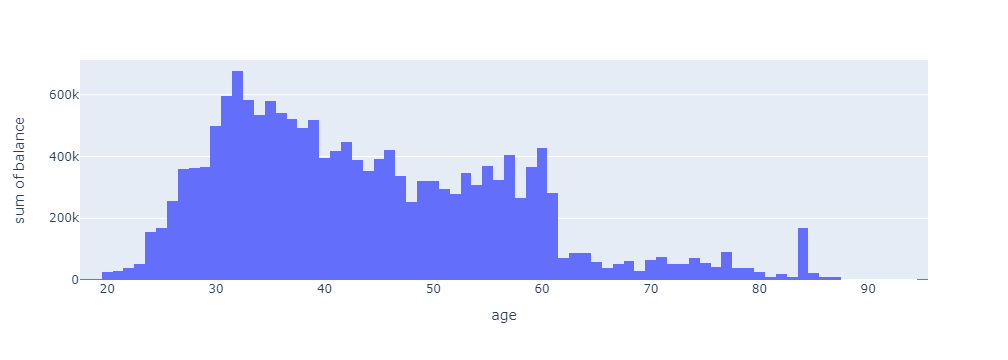

In [35]:
histogram(dfClientDataReadable,"age","balance")


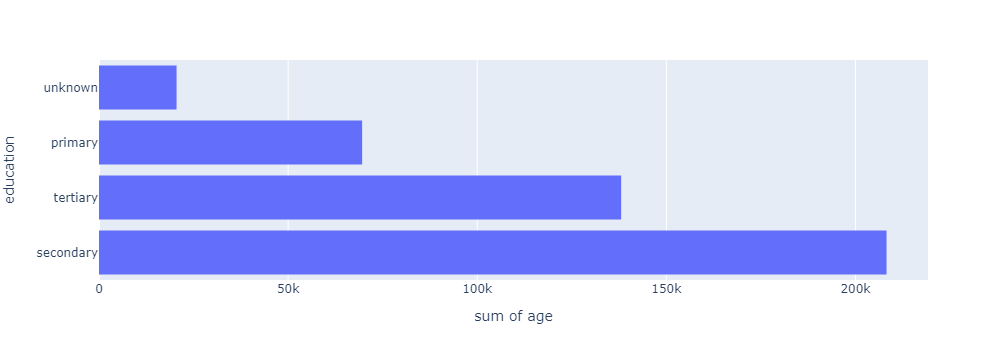

In [36]:
histogram(dfClientDataReadable,"age","education")

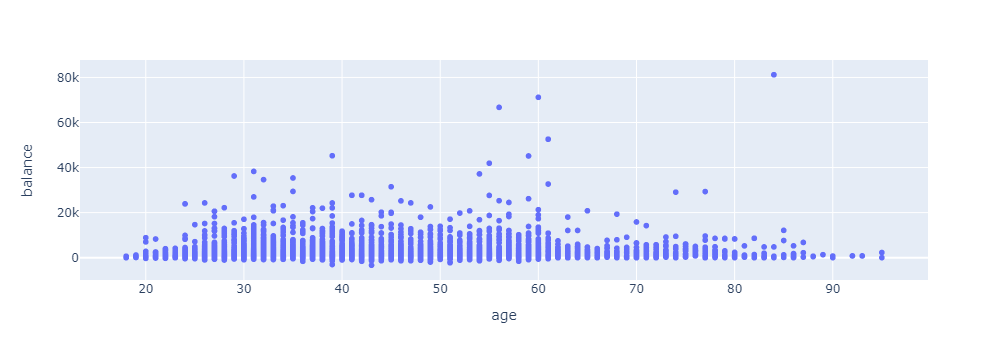

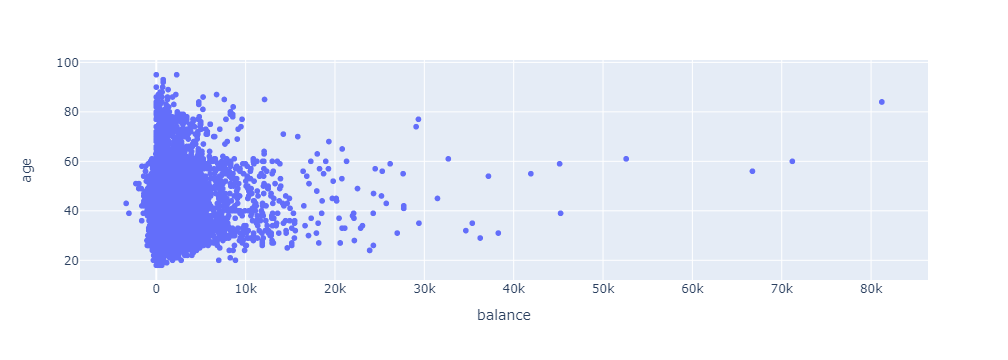

In [37]:
fig = px.scatter(dfClientDataReadable, x="age", y="balance")
fig.show()
fig = px.scatter(dfClientDataReadable, x="balance", y="age")
fig.show()

In [38]:
def print_score(learn_obj, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
	print("Score train : ", learn_obj.score(x_train, y_train,)*100, "%")
	print("Score test : ", learn_obj.score(x_test, y_test,)*100, "%")
print_score(rf)

Score train :  98.67643583077287 %
Score test :  62.901701323251416 %


# Second model

In [ ]:
# #split data for the second model

# dfBankCampaignData = dfCsv[['contact','day','month','duration','campaign','pdays','previous','poutcome','Target']]
# dfBankCampaignData

In [28]:
# rf1 = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [21]:
# rf1.fit(X=x_train, y=y_train)

In [20]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
# pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])

In [22]:
# print_score(rf1)